In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp  -r /content/drive/MyDrive/Colab_Notebooks/data/images/image_train /content
print("Ok!")
print("nombre d'images :")
!find /content/image_train/ -name '*.jpg' | wc -l

In [ ]:
!python --version
!find /content/image_train/ -name '*.jpg' | wc -l

In [11]:
import sys
sys.path.append('E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/src')
#sys.path.append('/content/drive/MyDrive/Colab_Notebooks/src')
#!pip install -r /content/drive/MyDrive/Colab_Notebooks/requirements.txt

In [12]:
import configparser
config = configparser.ConfigParser()
config.read('E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/Rakuten_config.ini') 
#config.read('/content/drive/MyDrive/Colab_Notebooks/Rakuten_config_colab.ini')
def get_RACINE_DOSSIER() :
    return config['DOSSIER']['RACINE_DOSSIER']
def get_RACINE_IMAGES() :
    return config['DOSSIER']['RACINE_IMAGES']
print( get_RACINE_DOSSIER())   
print( get_RACINE_IMAGES())   

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/input/
E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/


In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import os
import cv2

In [14]:
# lecture des données sources d'entrainement
df_feats=pd.read_csv(get_RACINE_DOSSIER() + 'X_train_update.csv')

# lecture des données cibles d'entrainement
df_target=pd.read_csv(get_RACINE_DOSSIER() + 'Y_train_CVw08PX.csv')


# création d'un dataframe globale -  jointure
df=df_feats.merge(df_target,on='Unnamed: 0',how='inner')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
cat=df_target['prdtypecode'].sort_values().unique()
cat
nomenclature=pd.read_csv(get_RACINE_DOSSIER() + 'NOMENCLATURE.csv',header=0,encoding='utf-8',sep=';',index_col=0)
catdict=nomenclature.to_dict()['definition']

In [5]:
df_feats.head(5)

Unnamed: 0                                        designation  \
0           0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1           1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2           2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3           3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4           4                               La Guerre Des Tuques   

                                         description   productid     imageid  
0                                                NaN  3804725264  1263597046  
1                                                NaN   436067568  1008141237  
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978  
3                                                NaN    50418756   457047496  
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786

In [6]:
df_target.head(5)

Unnamed: 0  prdtypecode
0           0           10
1           1         2280
2           2           50
3           3         1280
4           4         2705

In [15]:
df['nom_image']=df.apply(lambda row: "image_" +  str(row['imageid']) 
                                     + "_product_" + str(row['productid']) + ".jpg",axis=1)
print("Nb enreg ", str(df.shape[0]))
df.head(5)
df_img=df.copy()

Nb enreg  84916


### test de lecture d'images

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1319132924_product_4217994799.jpg
Sharpness: 18.244656


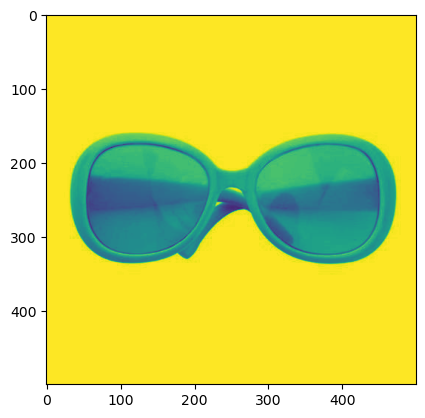

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1318786307_product_4217852988.jpg
Sharpness: 14.566795955055996


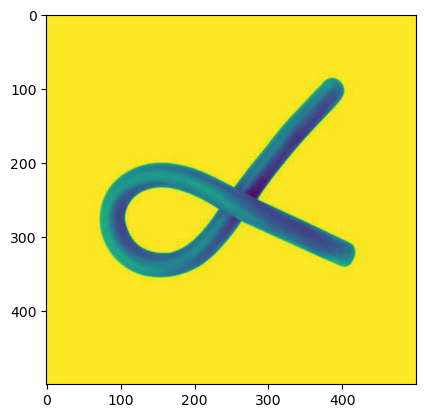

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1271444953_product_3976920344.jpg
Sharpness: 12.020439434495996


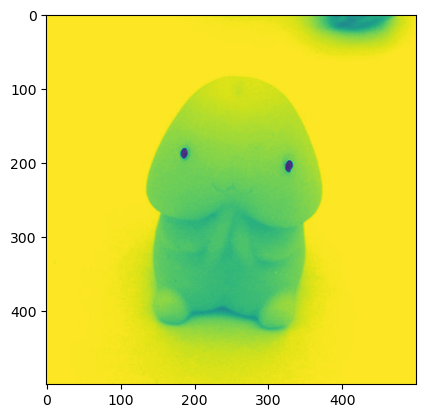

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1320225003_product_4215694880.jpg
Sharpness: 1.313664


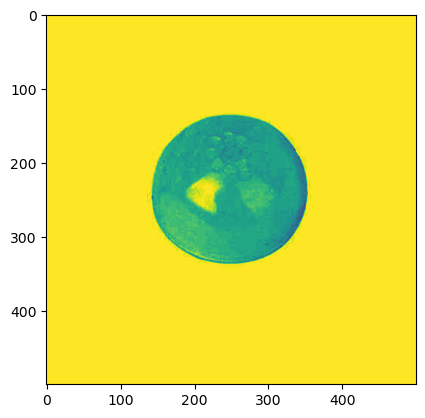

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1146793918_product_2515635680.jpg
Sharpness: 17.702947940464004


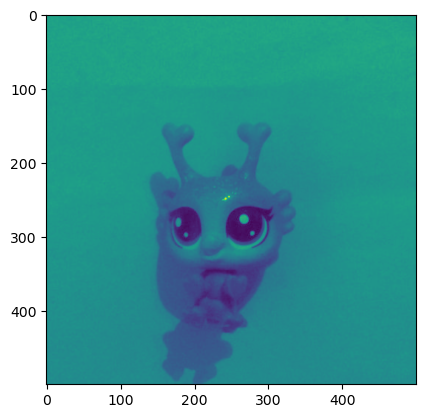

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1261195300_product_3898711669.jpg
Sharpness: 11.761664


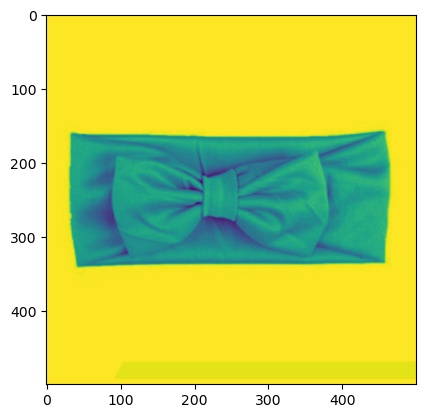

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1266794381_product_3940029089.jpg
Sharpness: 16.6416047216


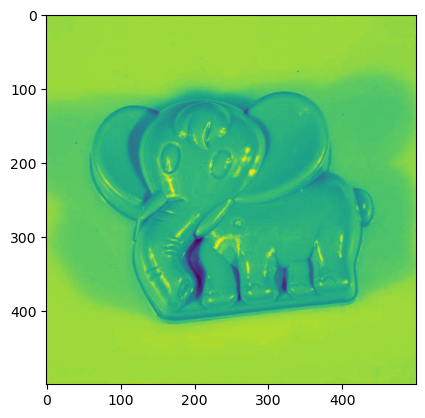

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1307268773_product_4171074435.jpg
Sharpness: 14.560744


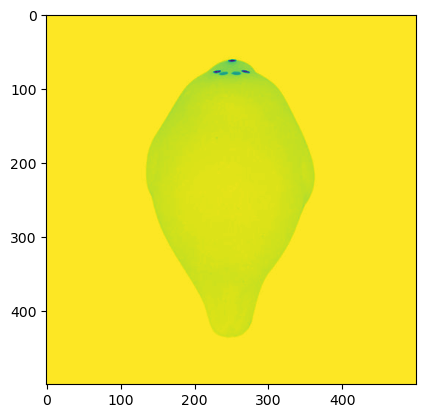

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1261183875_product_3898711376.jpg
Sharpness: 8.067127686400001


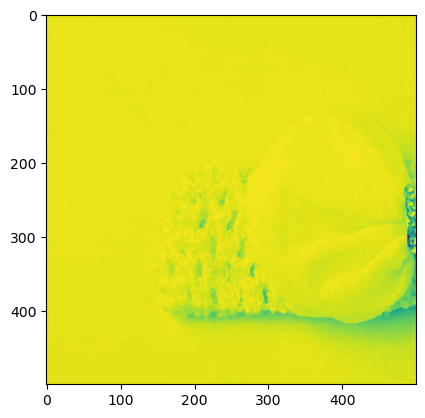

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1254365032_product_3861177574.jpg
Sharpness: 16.380464


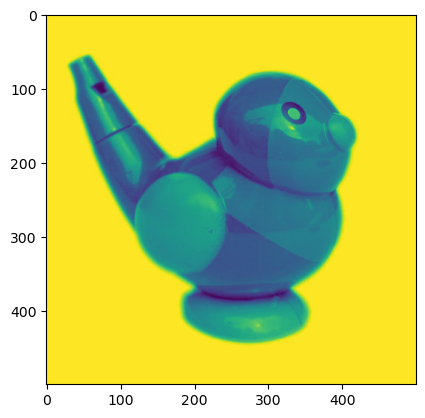

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1250156263_product_3830391201.jpg
Sharpness: 15.236335998976


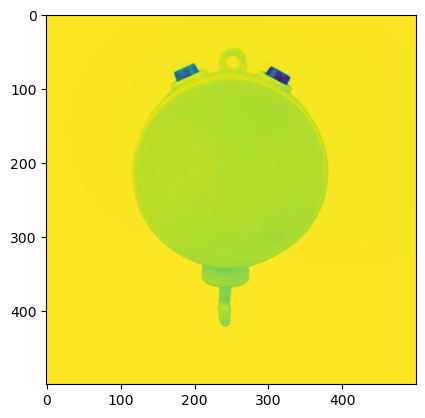

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1317401754_product_4212780747.jpg
Sharpness: 16.041064


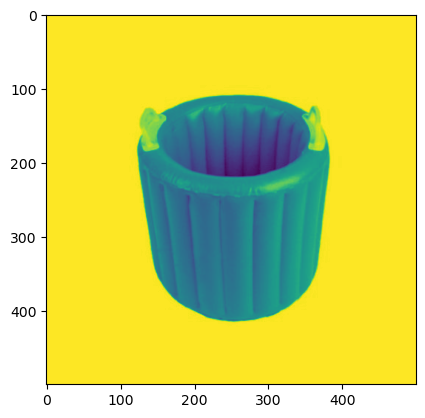

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1236526152_product_3708926457.jpg
Sharpness: 15.134904


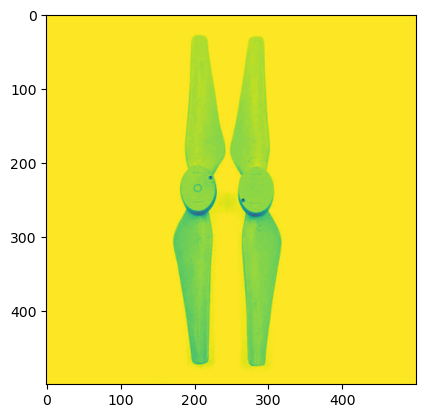

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1307425911_product_4171079683.jpg
Sharpness: 10.924008


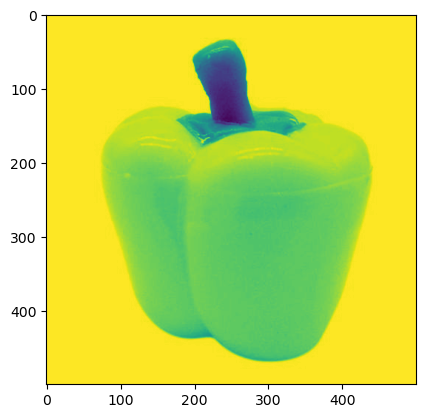

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1328348644_product_4250681803.jpg
Sharpness: 17.2477873404


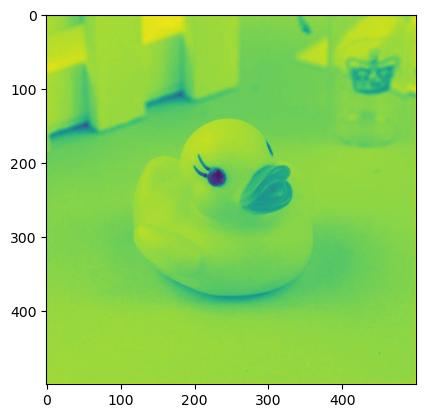

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1250157428_product_3830391286.jpg
Sharpness: 10.128104


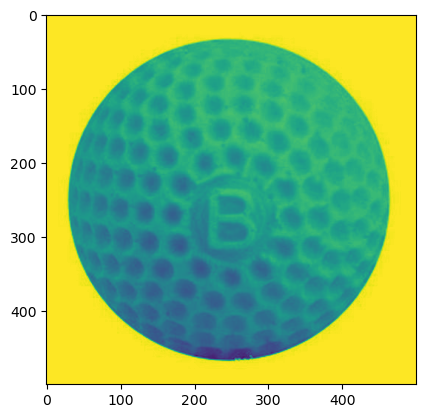

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1169778890_product_2878038864.jpg
Sharpness: 4.352464


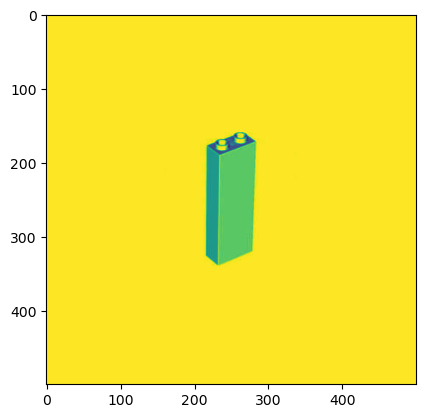

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_994764439_product_302646570.jpg
Sharpness: 18.669248


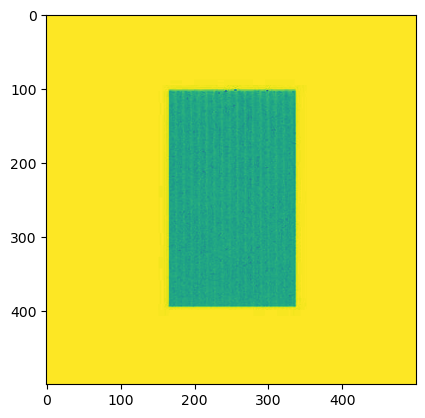

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1215379892_product_3470111496.jpg
Sharpness: 11.078641323504005


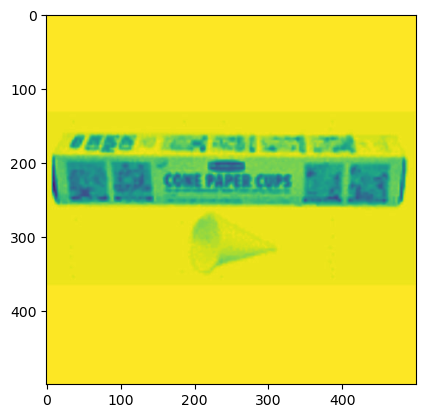

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1302249863_product_3793782107.jpg
Sharpness: 0.0


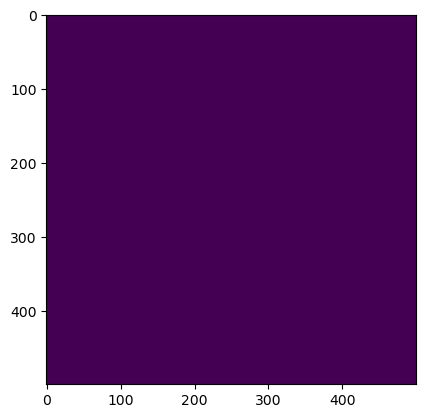

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_987568238_product_294339887.jpg
Sharpness: 16.929035741936


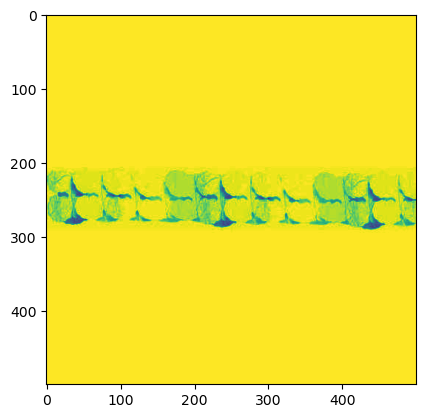

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1320461487_product_4221384887.jpg
Sharpness: 15.637712


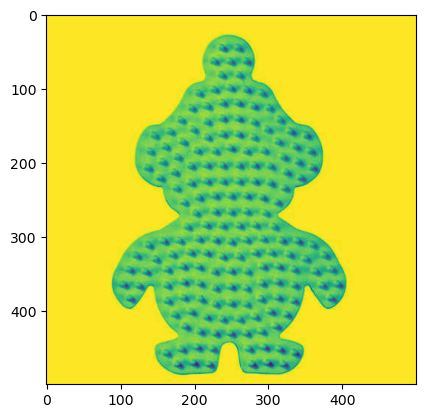

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1323959998_product_4232365042.jpg
Sharpness: 16.21176


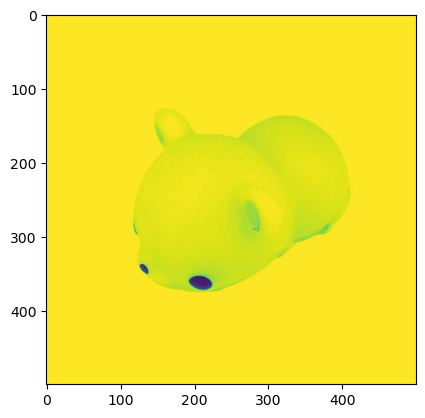

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1318959640_product_4213868749.jpg
Sharpness: 2.366136


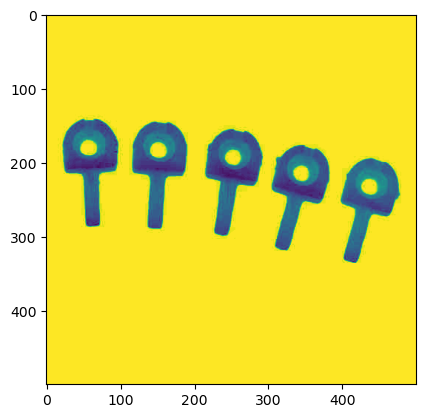

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1261269190_product_3898719959.jpg
Sharpness: 11.164856


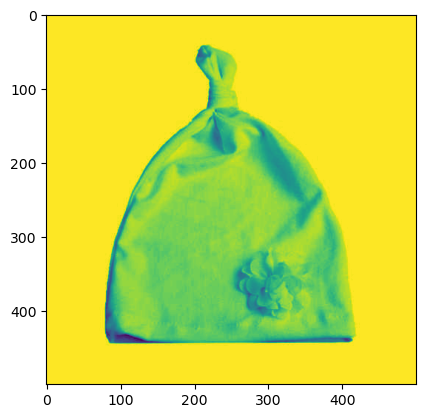

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1280417250_product_4044747438.jpg
Sharpness: 16.904024


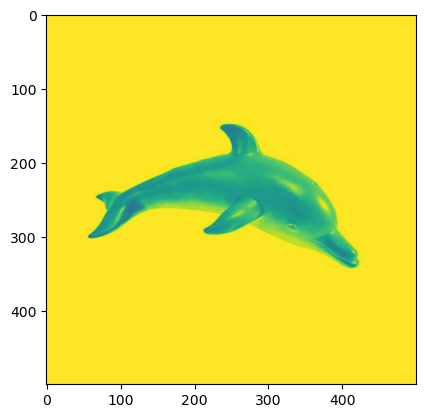

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1144107326_product_1123532939.jpg
Sharpness: 12.597848


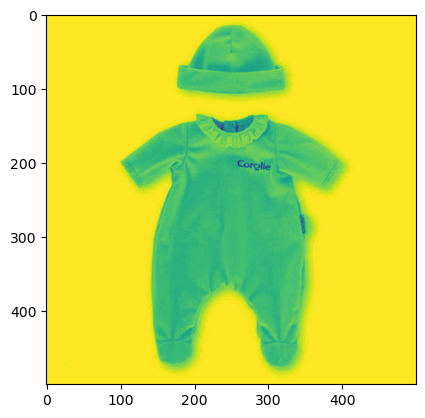

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1245205362_product_3789597364.jpg
Sharpness: 16.684707998704003


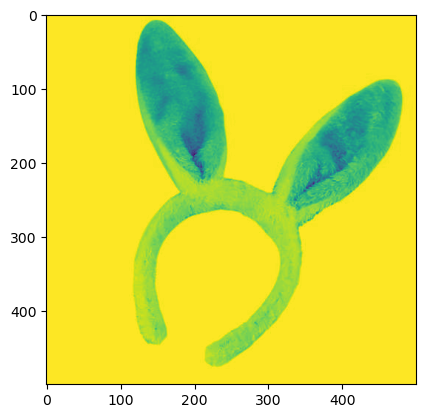

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1318750423_product_4215569304.jpg
Sharpness: 8.91088


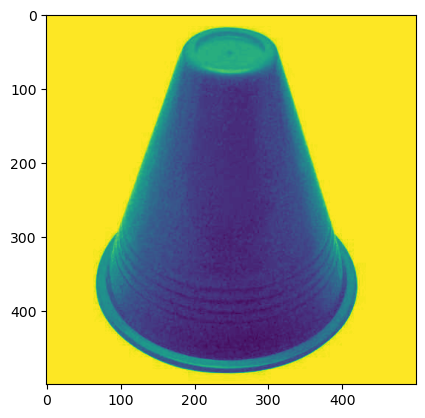

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1289249447_product_4087633655.jpg
Sharpness: 17.05664


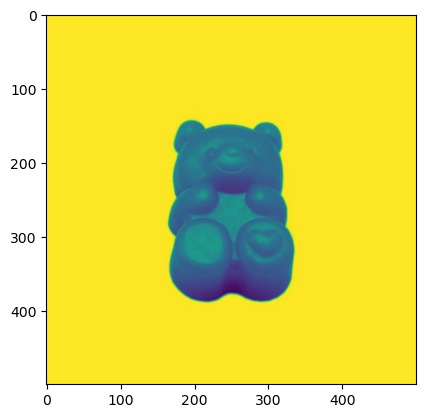

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1289121202_product_4085973516.jpg
Sharpness: 16.904024


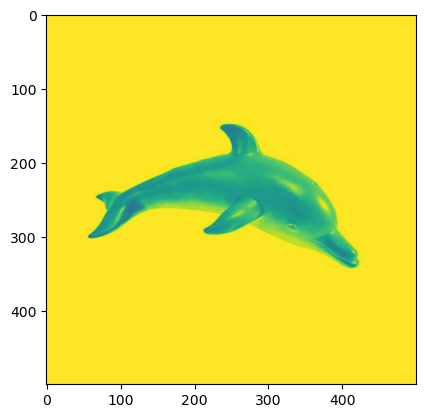

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1318960759_product_4213869198.jpg
Sharpness: 18.358504


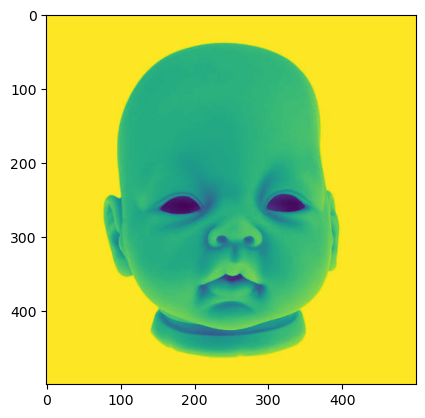

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1250160290_product_3830391465.jpg
Sharpness: 18.400536


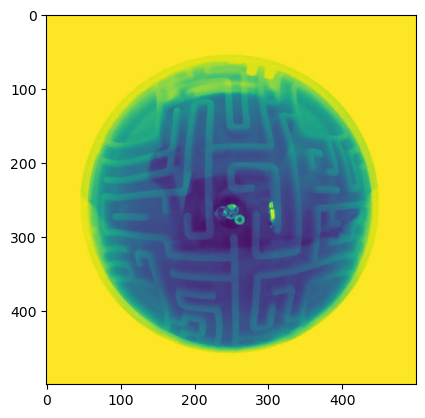

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1164148559_product_2779144310.jpg
Sharpness: 8.094915997295997


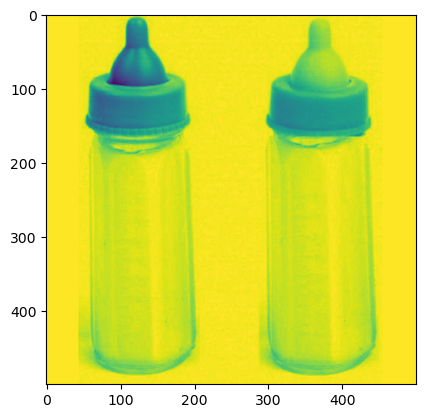

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1240756845_product_3748222794.jpg
Sharpness: 16.653976


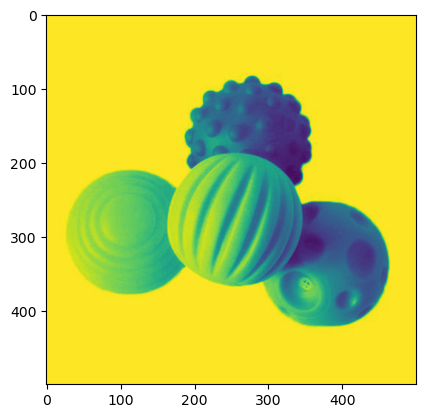

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1312603935_product_4195550042.jpg
Sharpness: 3.26644


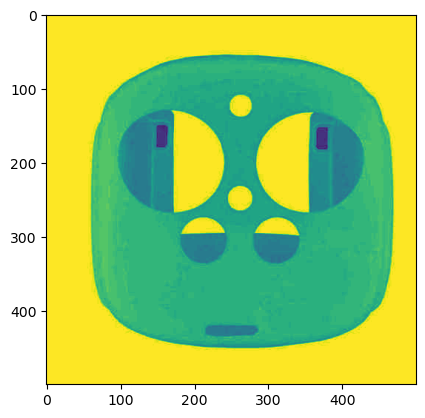

4870
(4870, 500, 500)


In [16]:
import os
import cv2
import numpy as np

from PIL import Image

def measure_sharpness(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return np.var(laplacian)

# Définir le chemin du dossier contenant les images
#folder_path = "C:\\Users\\MANUADMIN\\python\\DataScience\\Datascientest\\PROJET\\images\\image_train"
#folder_path = "C:\\Users\\shaky\\anaconda3\\envs\\Datascientest\\Datascience\\PROJET\\images\\image_train"
folder_path = get_RACINE_IMAGES() 


df_img=df[df['prdtypecode'].isin([40,50,60,1280])]
#print(df_img.head())

# Charger les images et les stocker dans un tableau
image_list = []


for filename in df_img['nom_image'][df_img['prdtypecode']==1280]:
    #print(os.path.join(folder_path, filename))
    #image = Image.open(os.path.join(folder_path, filename))
    #image.show()
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sharpness = measure_sharpness(gray)
        #print('Sharpness:', sharpness)
        if sharpness < 20:
            print(os.path.join(folder_path, filename))
            print('Sharpness:', sharpness)
            plt.imshow(gray)
            plt.show()
        image_list.append(gray)



# Convertir la liste d'images en un tableau numpy
images = np.array(image_list)
print(len(images))
print(images.shape)


# Afficher la première image
image=image_list[0]
#plt.imshow(image)
#plt.show()

#sharpness = measure_sharpness(image)
#print('Sharpness:', sharpness)




In [17]:
def measure_sharpness(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return np.var(laplacian)

sharpness = measure_sharpness(image)
print('Sharpness:', sharpness)


Sharpness: 436.81968


(4870, 500, 500)


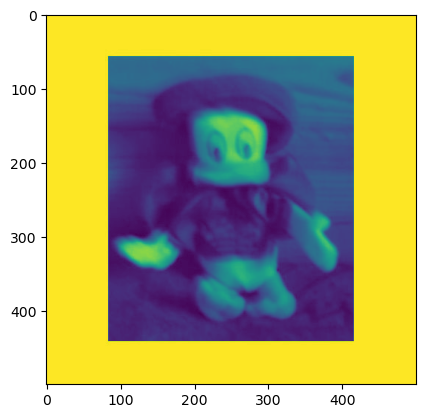

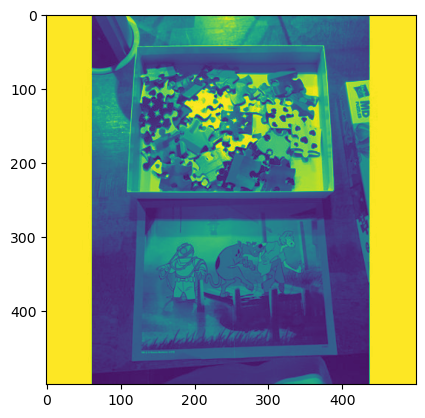

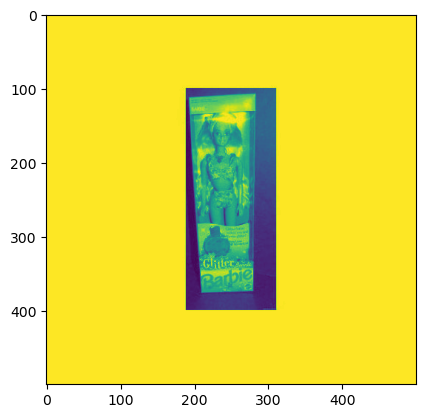

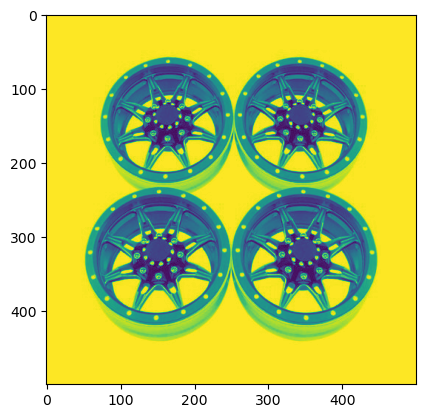

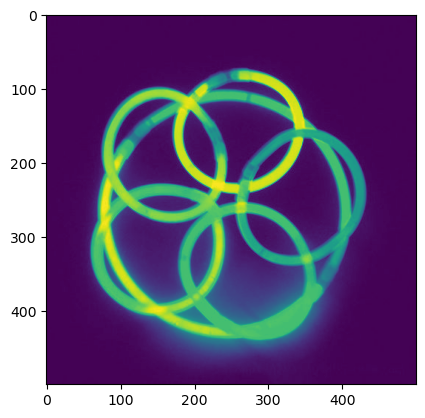

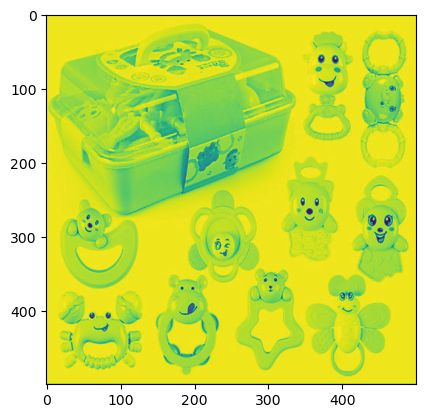

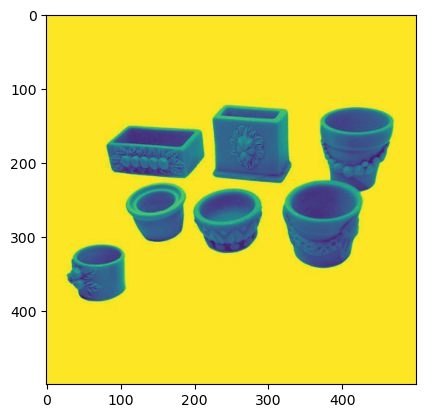

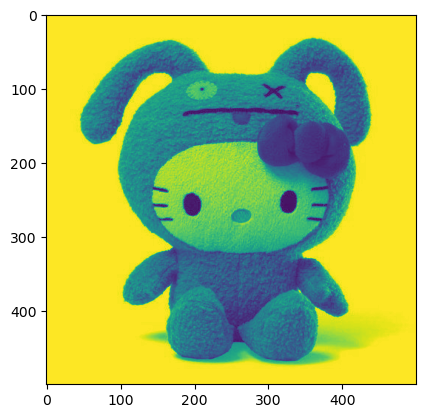

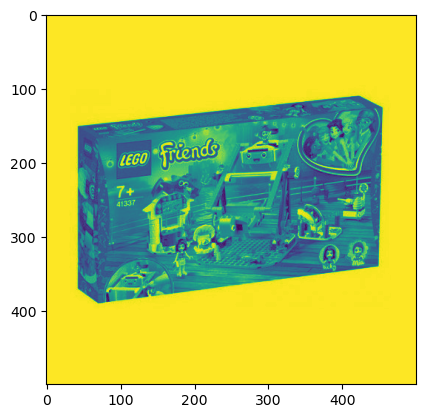

In [21]:
print(images.shape)
for i in range(9):
    image=images[i,:,:]
    plt.imshow(image)
    plt.show()

### test de contours et de formes (NB angles et de cercles)

In [24]:
Dfcontour=pd.DataFrame()
# Définir les classes de formes
classes = {0: 'cercle', 2: 'ligneE', 3: 'triangle', 4: 'rectangle', 5: 'pentagone', 6: 'hexagone'}
for i in range(len(images)):
    gray=images[i,:,:]
    # Convertir l'image en niveaux de gris
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Appliquer un filtre pour réduire le bruit de l'image
    gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)
    # Détecter les contours de l'image
    edges = cv2.Canny(gray_blur, 50, 150, apertureSize=3)
    # Extraire les caractéristiques des contours détectés
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shapes = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt, True)
        if perimeter == 0 :
            circularity = 0
        else :    
            circularity = 4 * np.pi * area / perimeter ** 2
        approx = cv2.approxPolyDP(cnt, 0.01 * perimeter, True)
        corners = len(approx)
        shapes.append((corners, circularity))
        """
        for contour in contours:
            # Approximer le contour
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Classer la forme en fonction du nombre de sommets
            num_vertices = len(approx)
            shape = classes.get(num_vertices, "unknown")
            print("Shape: ", shape)
        """  
    if len(shapes) != 0 :      
        if len(Dfcontour) == 0 :
            Dfcontour =pd.DataFrame(shapes, columns=['corners','circularity'])    
        else:
            Dfcontour = pd.concat([Dfcontour,pd.DataFrame(shapes, columns=['corners','circularity']) ]
                                  ,ignore_index=True,axis=0)
print(Dfcontour.head())    
    

   corners  circularity
0        4     0.738505
1        8     0.007081
2        8     0.003265
3        7     0.013843
4       12     0.009002


In [25]:
print(Dfcontour.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664123 entries, 0 to 664122
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   corners      664123 non-null  int64  
 1   circularity  664123 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 10.1 MB
None


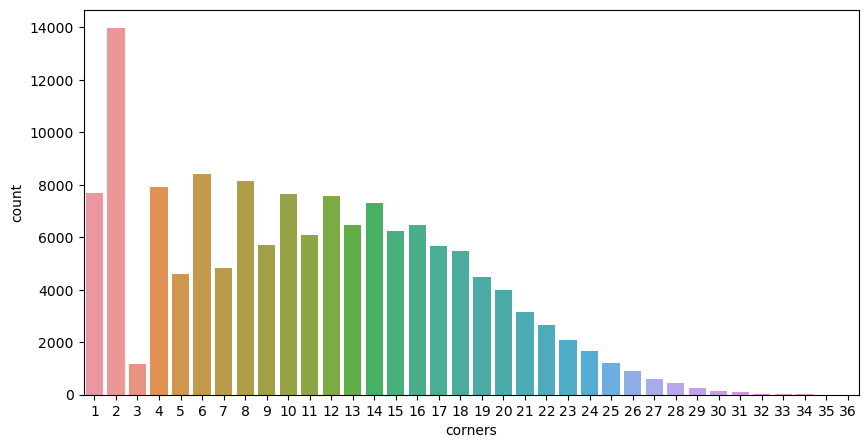

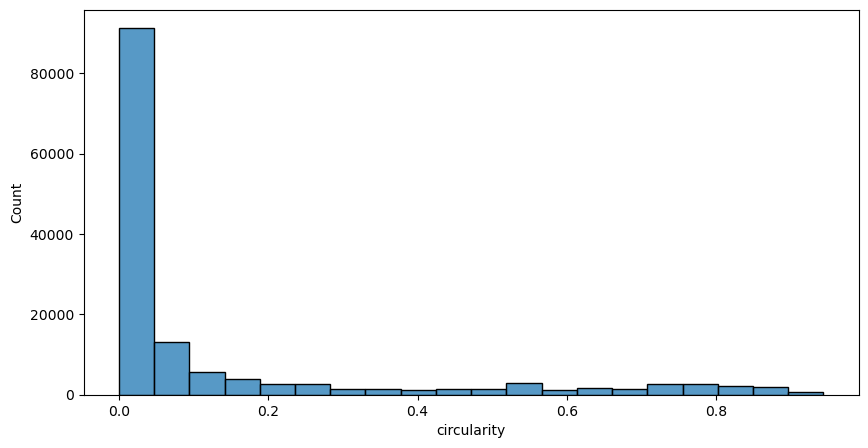

## Dataframe des contours par catégorie

In [26]:
df_img=df.copy()
Dfcontour=pd.DataFrame()
for c in cat:
    print("Catégorie : " , c,catdict[c])
    image_list=[]
    for filename in df_img[df_img['prdtypecode']==c]['nom_image']:
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            image_list.append(img)
    images = np.array(image_list)
    for i in range(len(images)):
        image=images[i,:,:,:]
        # Convertir l'image en niveaux de gris
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Appliquer un filtre pour réduire le bruit de l'image
        gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)
        # Détecter les contours de l'image
        edges = cv2.Canny(gray_blur, 50, 150, apertureSize=3)
        # Extraire les caractéristiques des contours détectés
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        shapes = []
        for cnt in contours:
            area = cv2.contourArea(cnt)
            perimeter = cv2.arcLength(cnt, True)
            if perimeter == 0 :
                circularity = 0
            else :    
                circularity = 4 * np.pi * area / perimeter ** 2
            approx = cv2.approxPolyDP(cnt, 0.01 * perimeter, True)
            corners = len(approx)
            #print("---------------")
            #print(area,perimeter,circularity,corners)
            shapes.append((c,corners, circularity))
        if len(shapes) != 0 :          
            if len(Dfcontour) == 0 :
                Dfcontour =pd.DataFrame(shapes, columns=['prdtypecode','corners','circularity'])    
            else:
                Dfcontour = pd.concat([Dfcontour,pd.DataFrame(shapes, columns=['prdtypecode','corners','circularity']) ]
                                      ,ignore_index=True,axis=0)
print(Dfcontour.head())    

Catégorie :  10 livres
Catégorie :  40 jeux video pour pc et consoles
Catégorie :  50  accesoires jeux video
Catégorie :  60 consoles de jeux video
Catégorie :  1140 produits derives “geeks” et figurines
Catégorie :  1160 cartes collectionables
Catégorie :  1180 figurines collectionables pour jeux de societe
Catégorie :  1280 jouets, peluches, poupees
Catégorie :  1281 jeux de societe/cartes
Catégorie :  1300 Petites voitures (jouets) et maquettes
Catégorie :  1301 accesoires pour petis enfants/bebes et mobilier de jeu (flechettes, billard, babyfoot)
Catégorie :  1302 jeux d'exterieur
Catégorie :  1320 sacs pour femmes et accesore petite enfance
Catégorie :  1560 Mobilier et produits decoration/rangement pour la maison
Catégorie :  1920 linge de maison (cousins, rideaux, serviettes, nappes, draps)
Catégorie :  1940 nouriture (cafes,infusions,conserves, epices,etc)
Catégorie :  2060 lampes et accesoires decoration pour maison
Catégorie :  2220 accesoires mascots/pets
Catégorie :  2280 m

In [27]:
Dfcontour.to_csv('Dfcontour.csv')

In [10]:
Dfcontour= pd.read_csv('Dfcontour.csv')

### Histogramme des angles toutes catagories confonfues

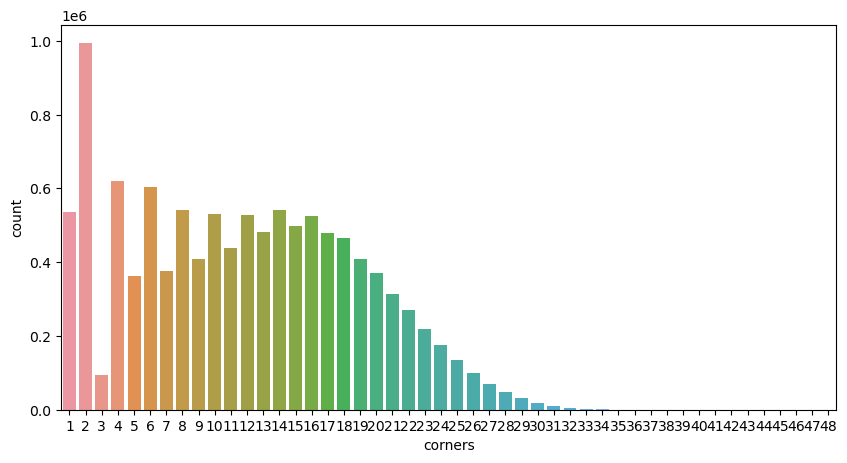

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x=Dfcontour['corners'])
plt.show()

In [ ]:
### Histogramme des circularités toutes catagories confonfues

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(x=Dfcontour['circularity'],bins=20)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x500 with 0 Axes>

In [42]:
Dfcontour.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11198861 entries, 0 to 11198860
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   prdtypecode  object 
 1   corners      object 
 2   circularity  float64
dtypes: float64(1), object(2)
memory usage: 256.3+ MB


In [11]:
Dfcontour=pd.read_csv('Dfcontour.csv')
Dfcontour.info()
Dfcontour['prdtypecode'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12962253 entries, 0 to 12962252
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   prdtypecode  int64  
 2   corners      int64  
 3   circularity  float64
dtypes: float64(1), int64(3)
memory usage: 395.6 MB


1301    910280
1940    910280
2585    910280
2905    910280
2220    910280
1302    910280
1320    910280
60      910280
40      814307
1300    286218
2060    286218
1160    286218
2462    286218
1180    286218
2583    286218
1140    286218
2403    286218
1920    286218
1281    286218
1560    286218
2582    286218
2522    286218
2705    286218
1280    286218
50      286218
2280    143109
10      143109
Name: prdtypecode, dtype: int64

10 livres


AttributeError: Text.set() got an unexpected keyword argument 'step'

<Figure size 1000x500 with 0 Axes>

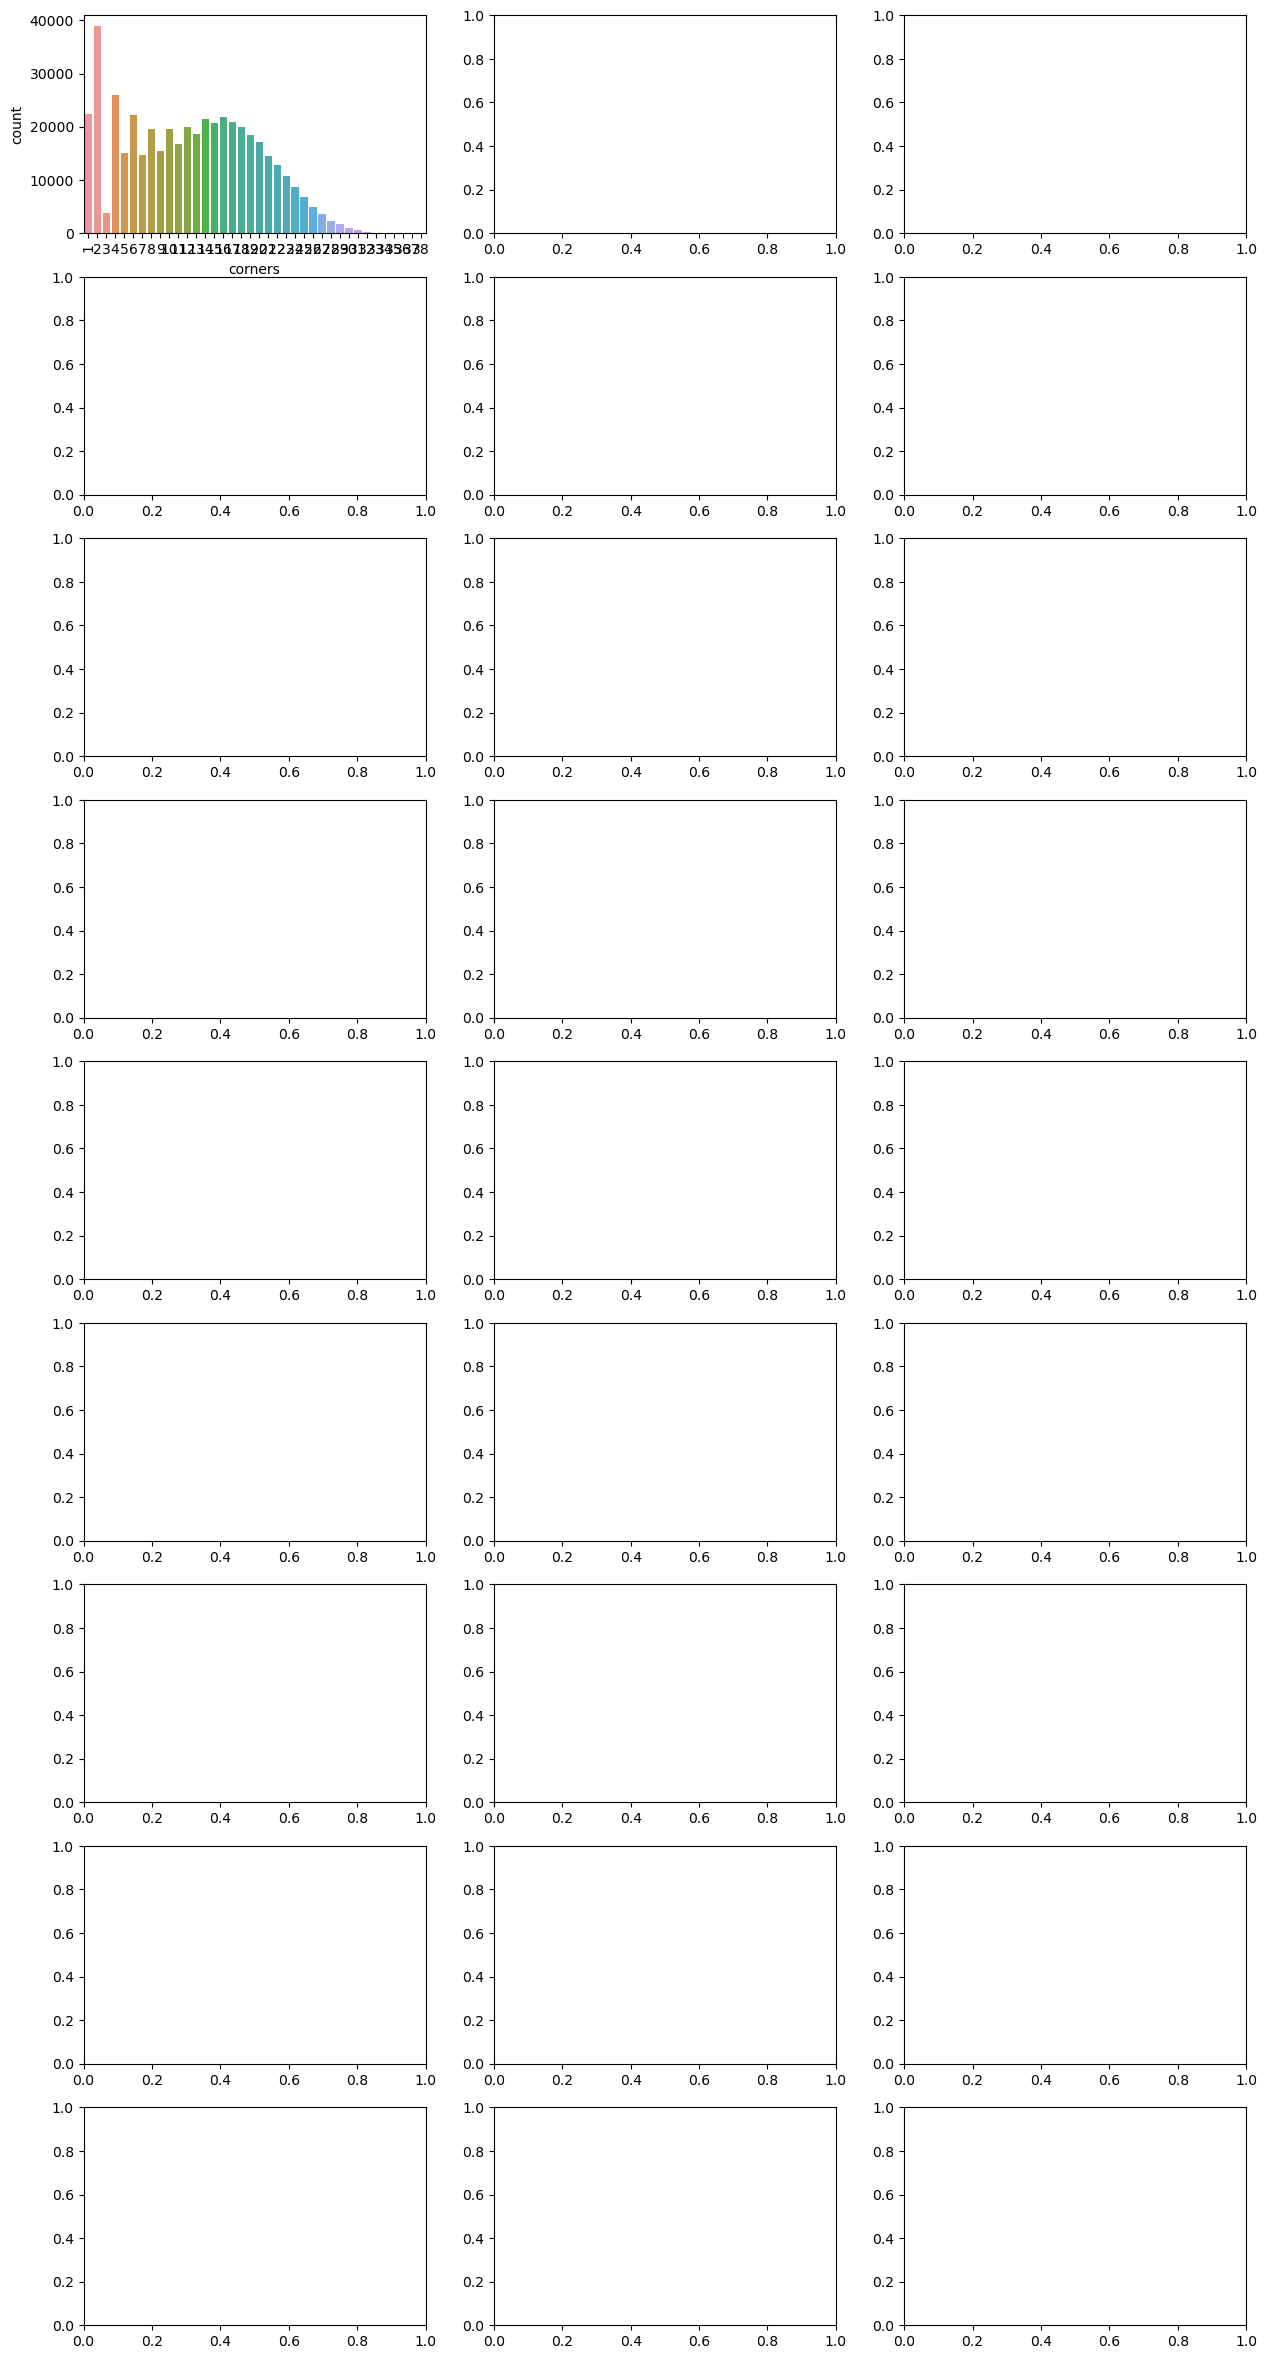

<Figure size 1000x500 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
fig, axs = plt.subplots(9, 3, figsize=(15,30))
for c,ax in zip(cat,axs.flat):
    print(c,catdict[c])
    plt.figure(figsize=(10,5))
    sns.countplot(x=Dfcontour[Dfcontour['prdtypecode']==c]['corners'],ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,step=2)
plt.subplots_adjust( wspace=0.1,hspace=0.5)    
plt.show()

10


<Figure size 1000x500 with 0 Axes>

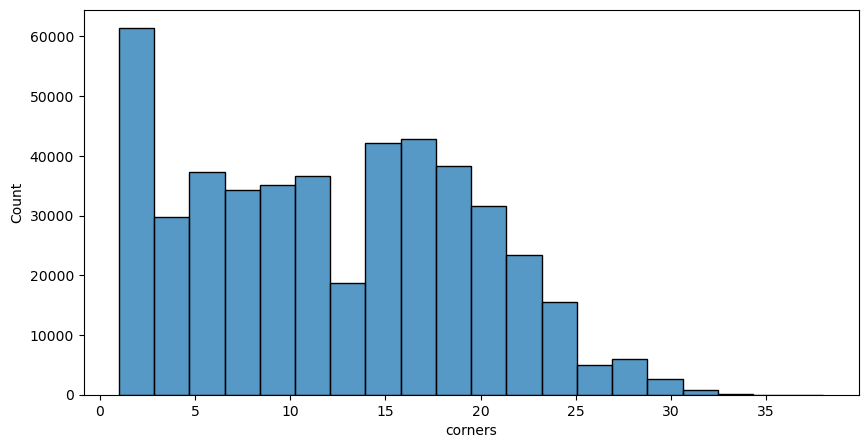

40


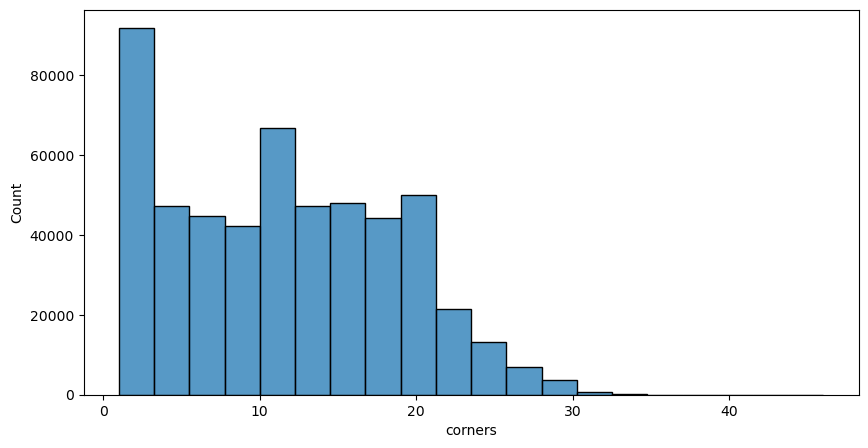

50


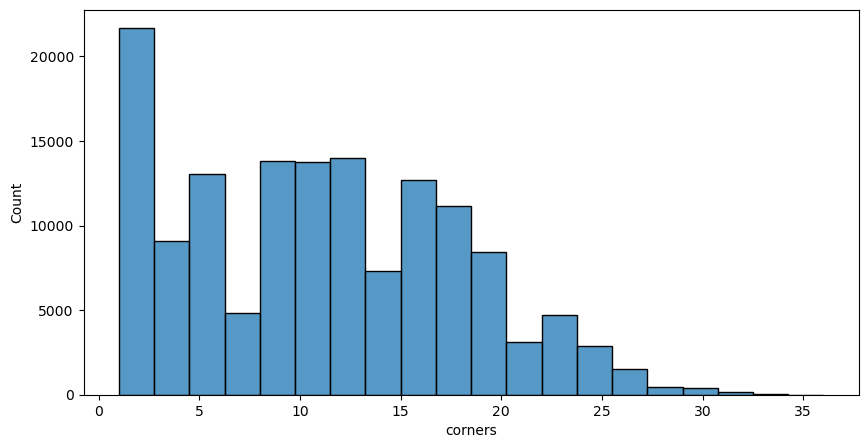

60


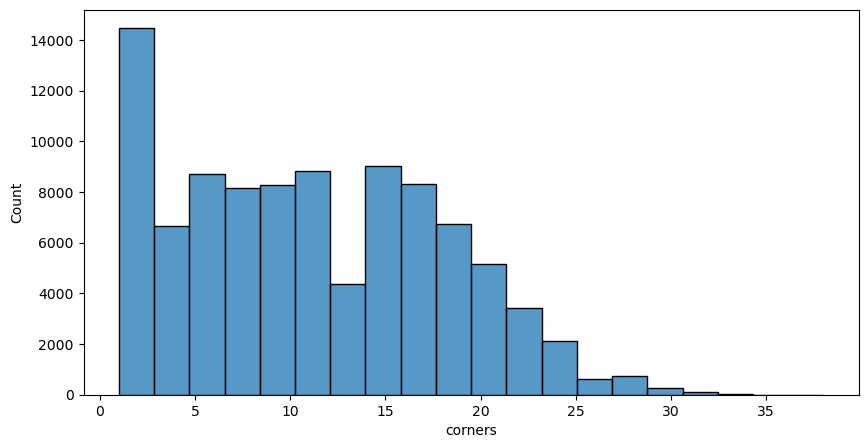

1140


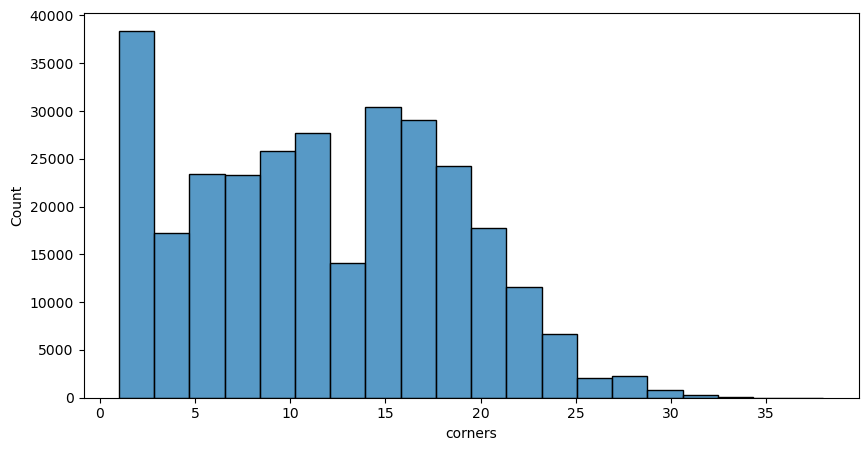

1160


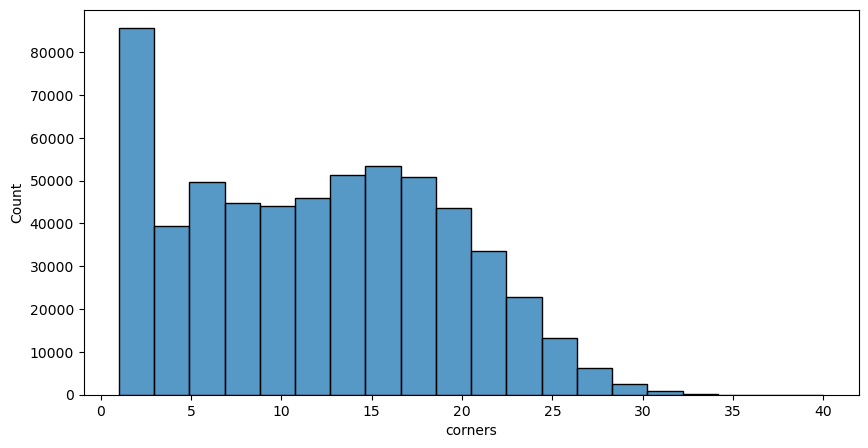

1180


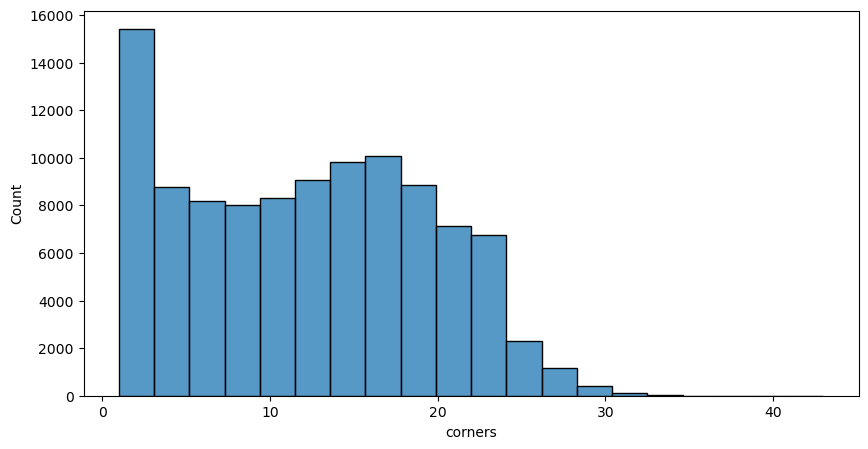

1280


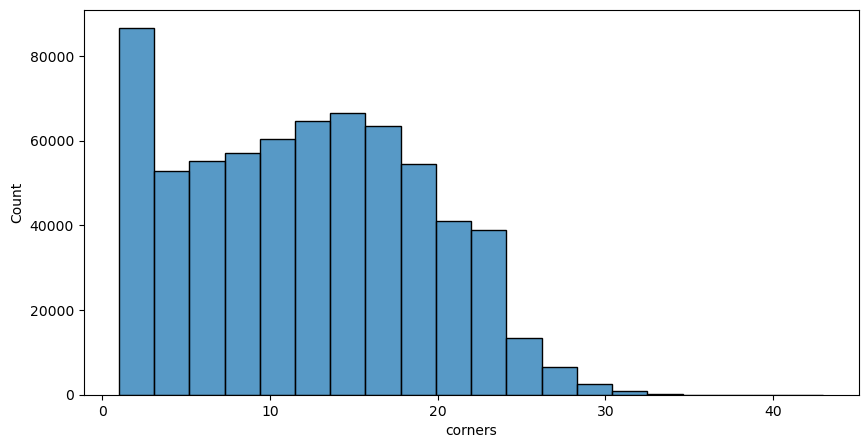

1281


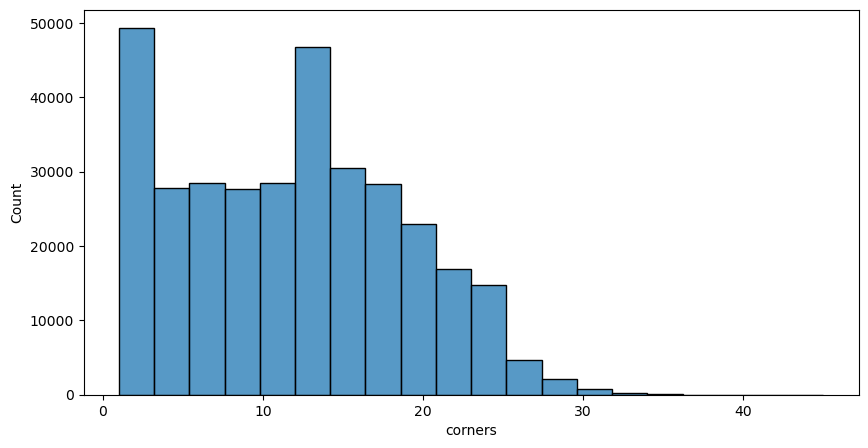

1300


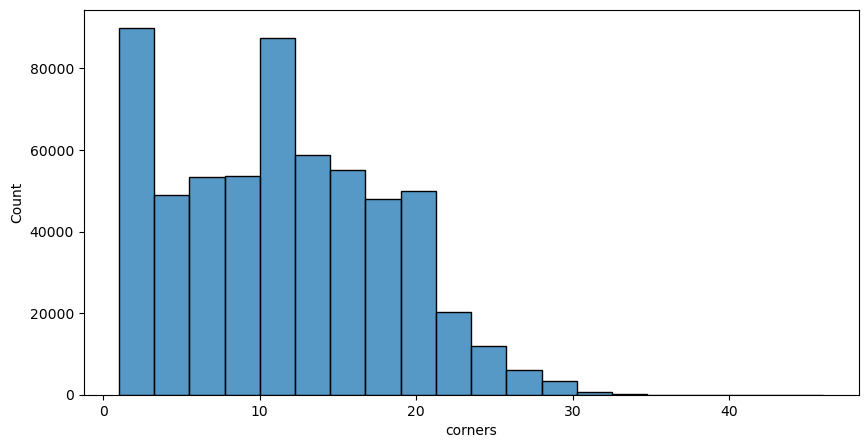

1301


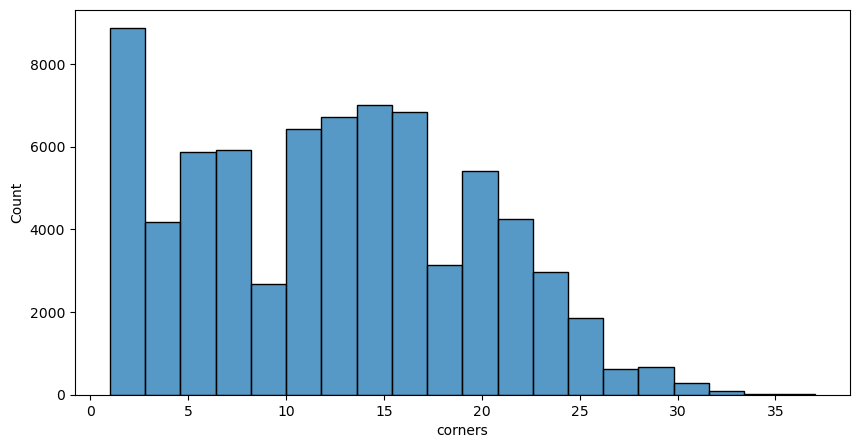

1302


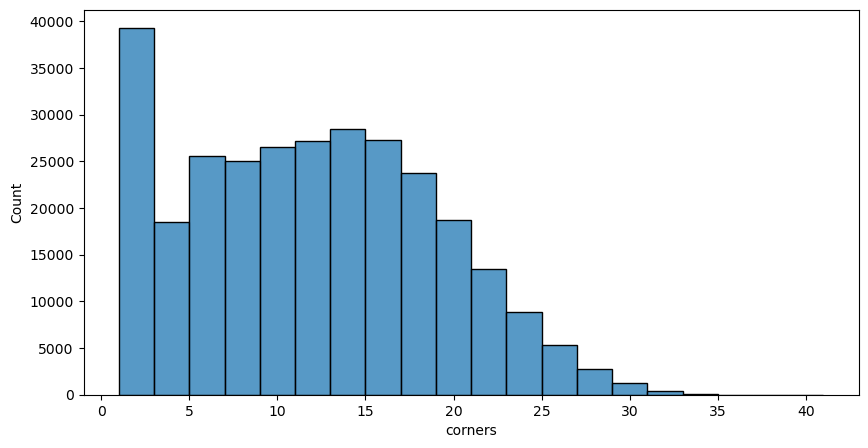

1320


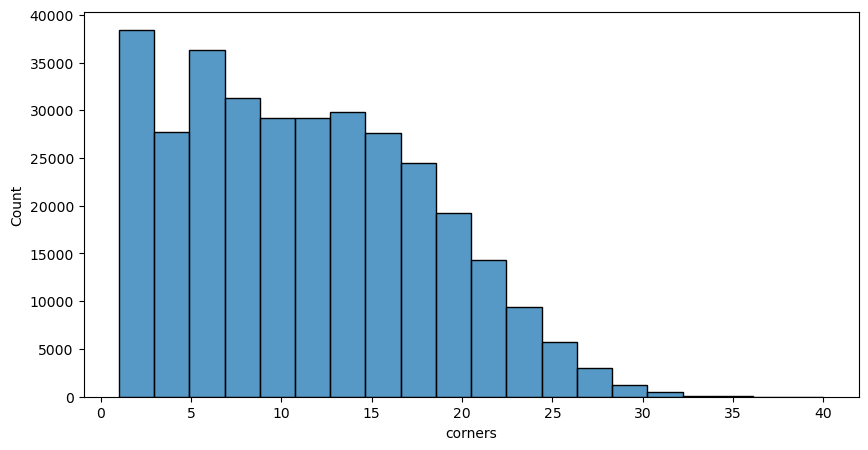

1560


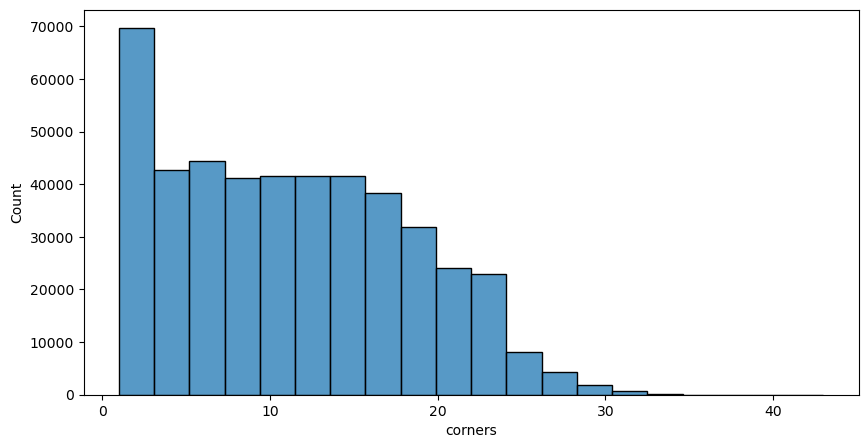

1920


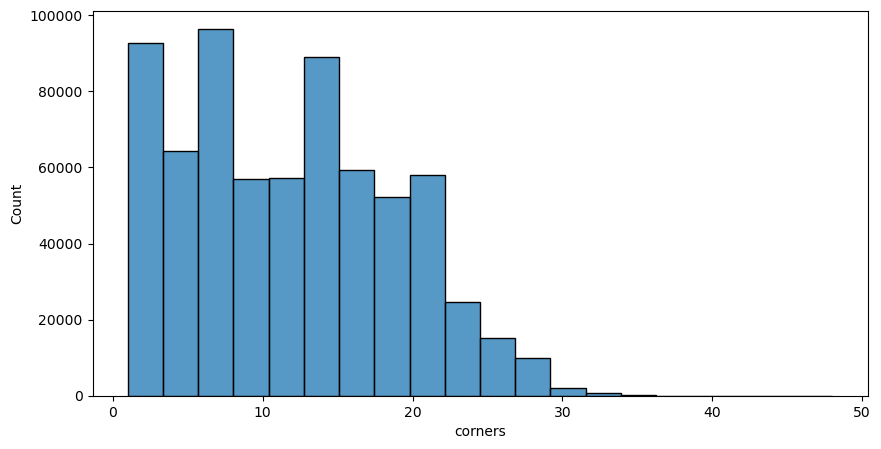

1940


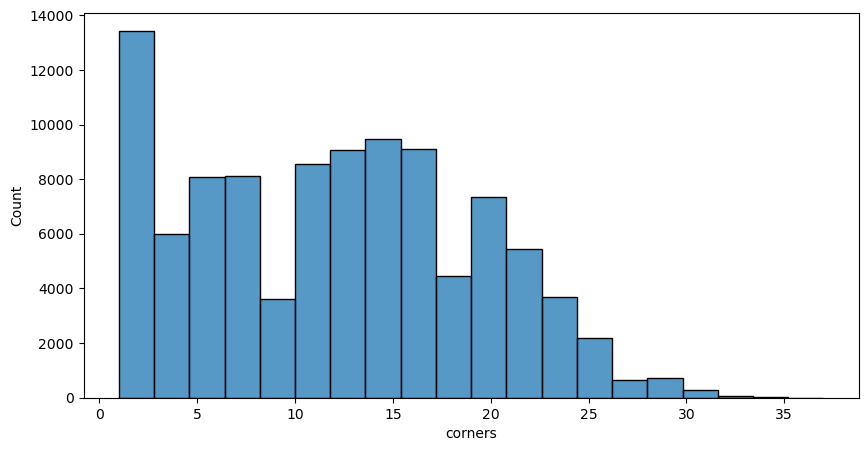

2060


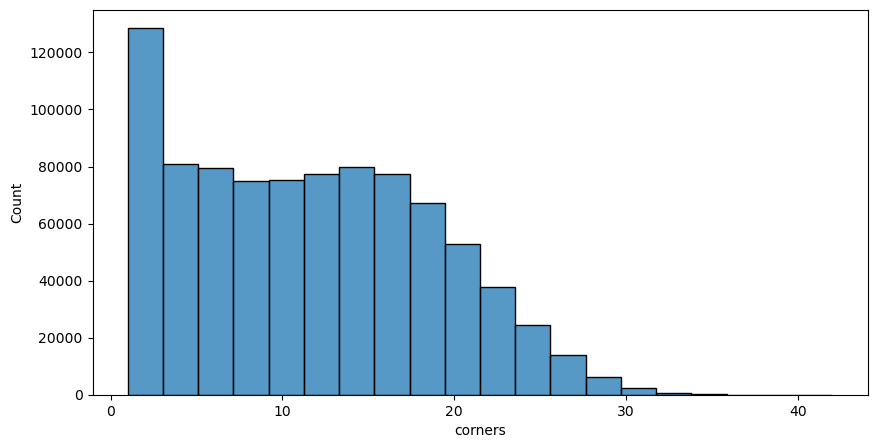

2220


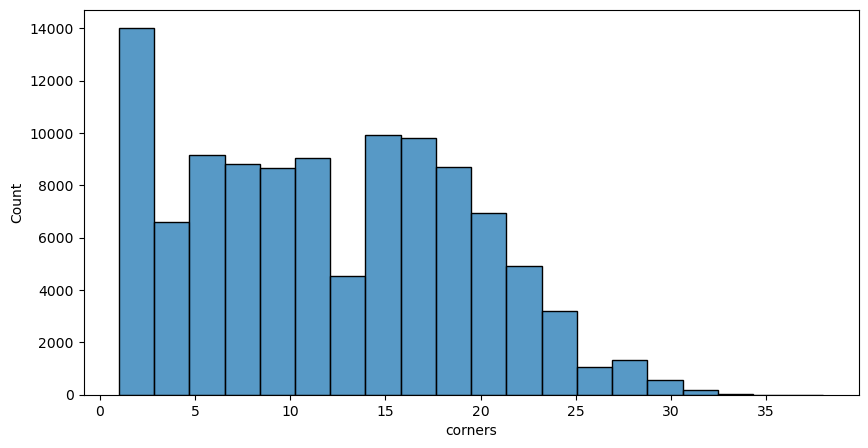

2280


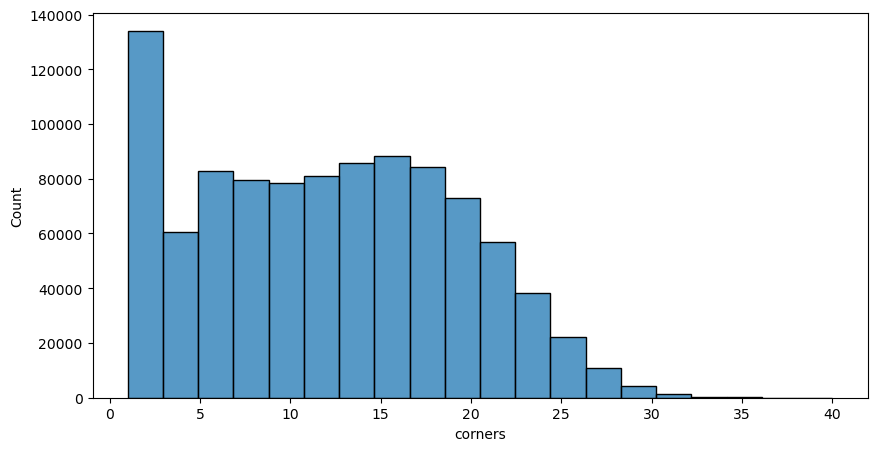

2403


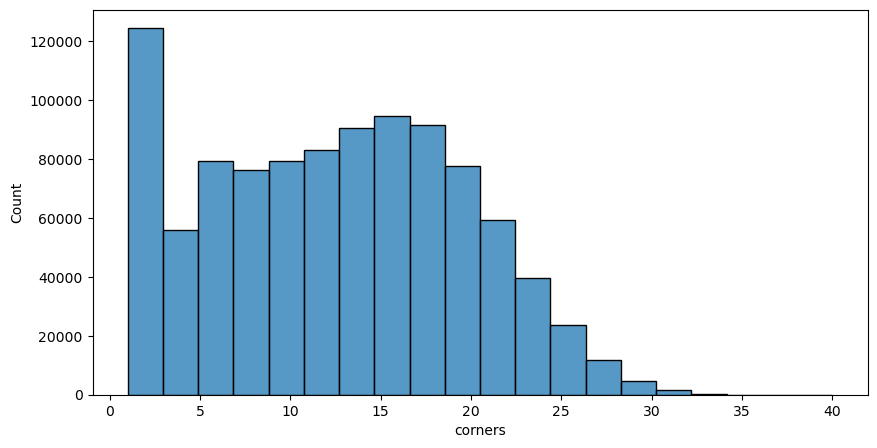

2462


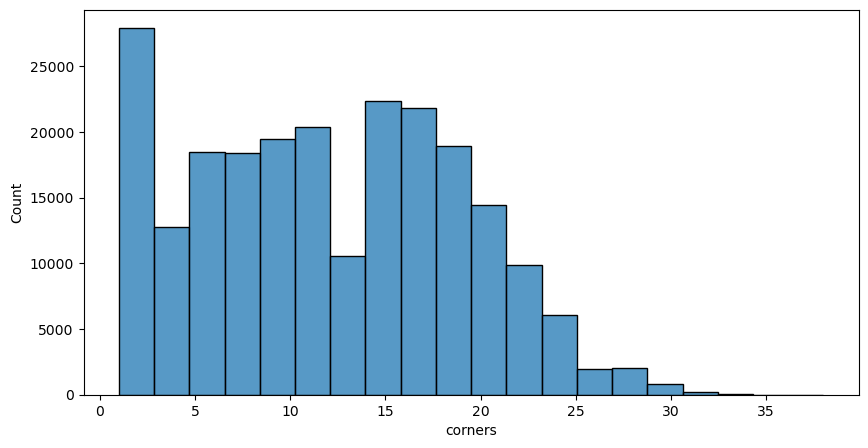

2522


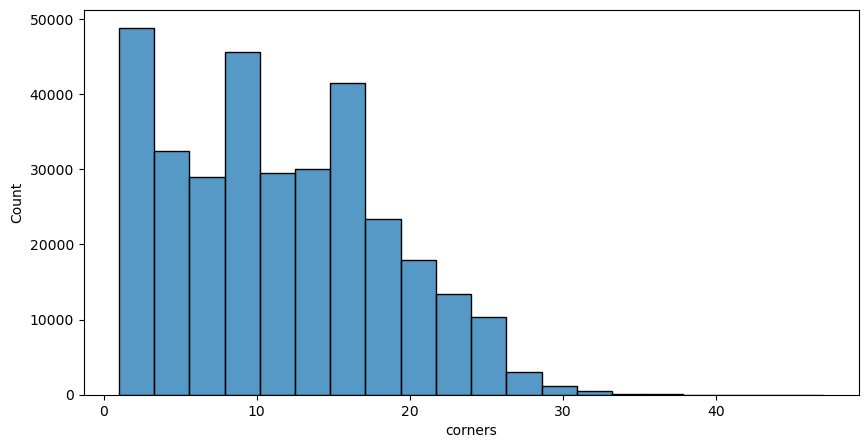

2582


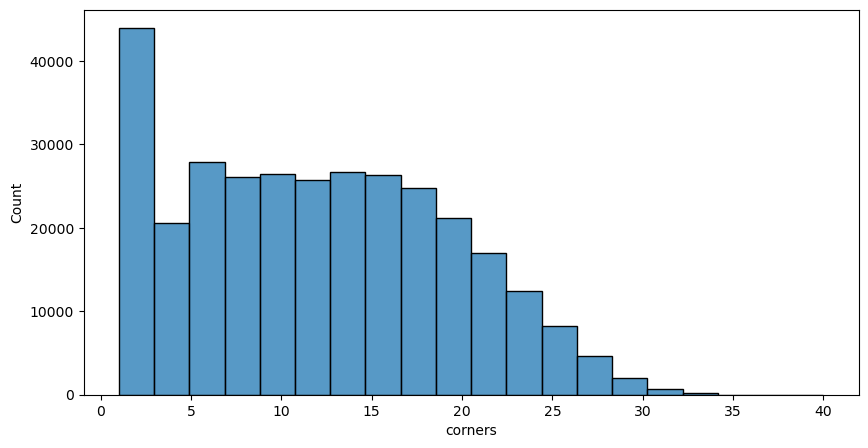

2583


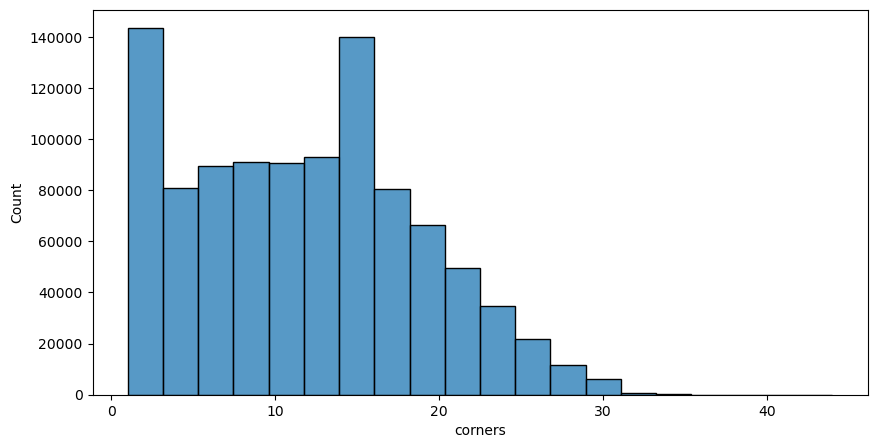

2585


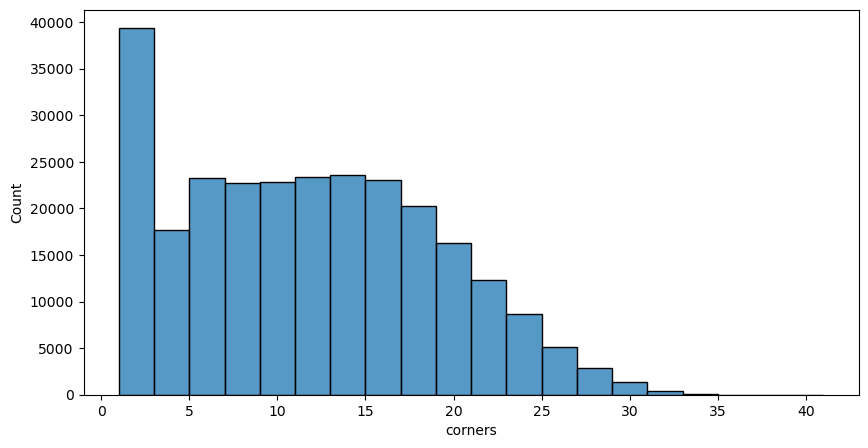

2705


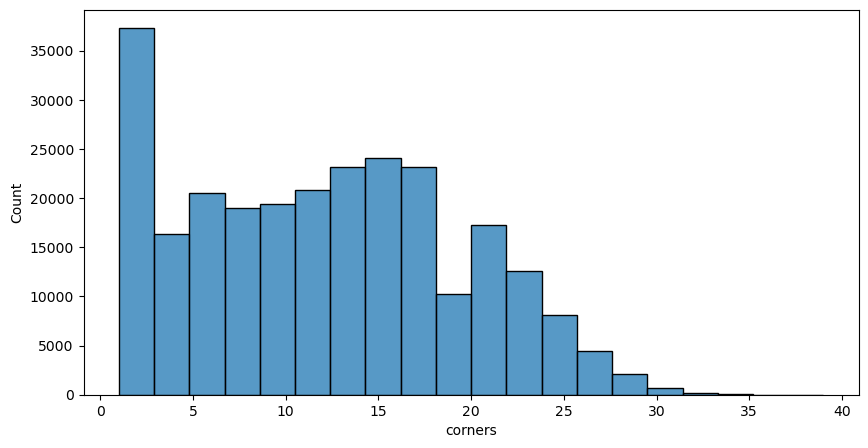

2905


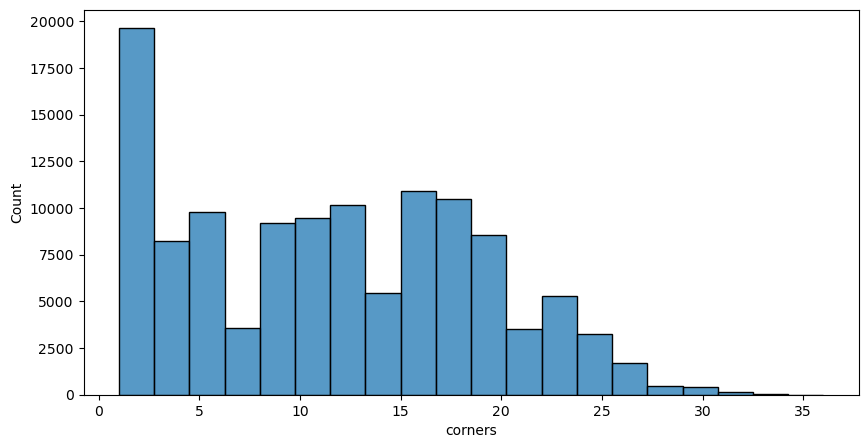

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
for c in cat:
    print(c,catdict[c])
    plt.figure(figsize=(10,5))
    sns.histplot(x=Dfcontour[Dfcontour['prdtypecode']==c]['corners'],bins=20)
    plt.show()